<a href="https://colab.research.google.com/github/shailkc/NIFTY50/blob/initial%2Fcommit/modelling_on_nsei_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings

In [ ]:
# NSEI Data
data = pd.read_excel("data.xlsx", index_col="Date")

In [ ]:
print(data.shape)

(2469, 6)


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-01,5697.350098,5720.950195,5675.899902,5704.399902,5704.399902,97800.0
2013-04-02,5701.700195,5754.600098,5687.149902,5748.100098,5748.100098,106400.0
2013-04-03,5740.200195,5744.950195,5650.100098,5672.899902,5672.899902,140700.0
2013-04-04,5640.649902,5644.450195,5565.649902,5574.750000,5574.750000,134600.0
2013-04-05,5568.100098,5577.299805,5534.700195,5553.250000,5553.250000,137500.0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2013-04-01 to 2023-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2455 non-null   float64
 1   High       2455 non-null   float64
 2   Low        2455 non-null   float64
 3   Close      2455 non-null   float64
 4   Adj Close  2455 non-null   float64
 5   Volume     2455 non-null   float64
dtypes: float64(6)
memory usage: 135.0 KB
None


In [ ]:
data.isnull().sum()

Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64

In [ ]:
# To Check any row contains Null or Not
data[data.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-15,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filling Null Rows with previous day data
data = data.fillna(method='ffill')

In [ ]:
adjCloseValue = data.reset_index()['Adj Close']
adjCloseValue.shape

(2469,)

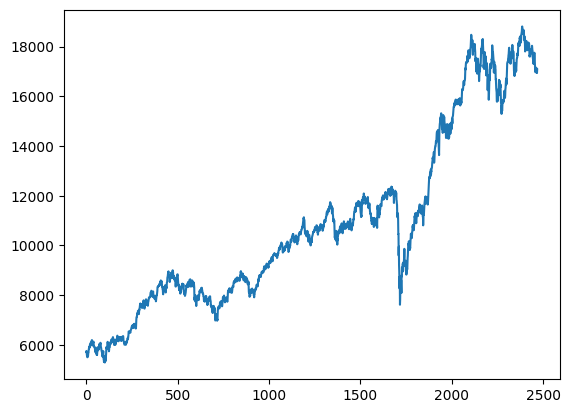

In [ ]:
plt.plot(adjCloseValue)

In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

In [ ]:
# train/test split
x=data[features]
y=data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape,x_test.shape)
data.iloc[[1727]]

(1728, 4) (741, 4)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-08,8688.900391,9131.700195,8653.900391,8748.75,8748.75,896500.0


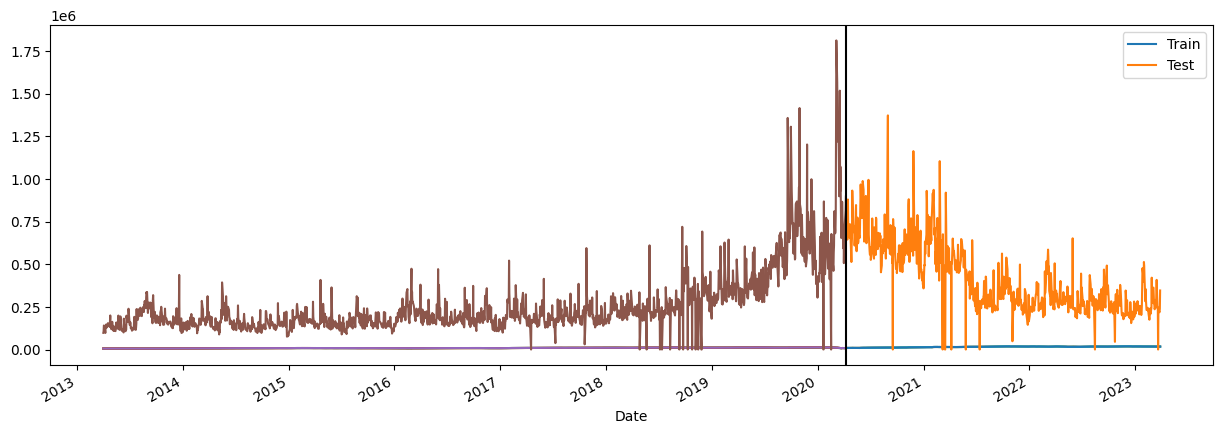

In [ ]:
#train/test data plotting
train=data.loc[data.index<='2020-04-08']
test=data.loc[data.index>'2020-04-08']

fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training Set')
test.plot(ax=ax,label='Test Set')
ax.axvline('2020-04-09',color='black')
ax.legend(['Train','Test'])
plt.show()

**Applying Linear Regression Model**

In [ ]:
#get linear regressor, and train on x and y data
regressor_lr = LinearRegression()
regressor_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#print regressor data
print(regressor_lr.coef_)
print(regressor_lr.intercept_)

[-6.96732812e-01  9.13900513e-01  7.83429659e-01  4.24196418e-06]
-8.055411120185454


In [ ]:
#predict value against test
y_pred_lr = regressor_lr.predict(x_test)

In [ ]:
#evaluate model's performance on train data
predict_lr = regressor_lr.predict(x_train)
r2 = r2_score(y_train, predict_lr)
mse = mean_squared_error(y_train, predict_lr)
rmse = mean_squared_error(y_train, predict_lr, squared=False)
mae = mean_absolute_error(y_train, predict_lr)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999013013724078
Mean Squared Error: 1325.5111844318324
Root Mean Squared Error: 36.407570427478845
Mean Absolute Error: 23.985612054910227


In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
mae = mean_absolute_error(y_test, y_pred_lr)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999105676859233
Mean Squared Error: 1138.378342562973
Root Mean Squared Error: 33.73986281185763
Mean Absolute Error: 23.796324044191593


In [ ]:
test.index

DatetimeIndex(['2020-04-09', '2020-04-13', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24',
               ...
               '2023-03-16', '2023-03-17', '2023-03-20', '2023-03-21',
               '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-27',
               '2023-03-28', '2023-03-29'],
              dtype='datetime64[ns]', name='Date', length=741, freq=None)

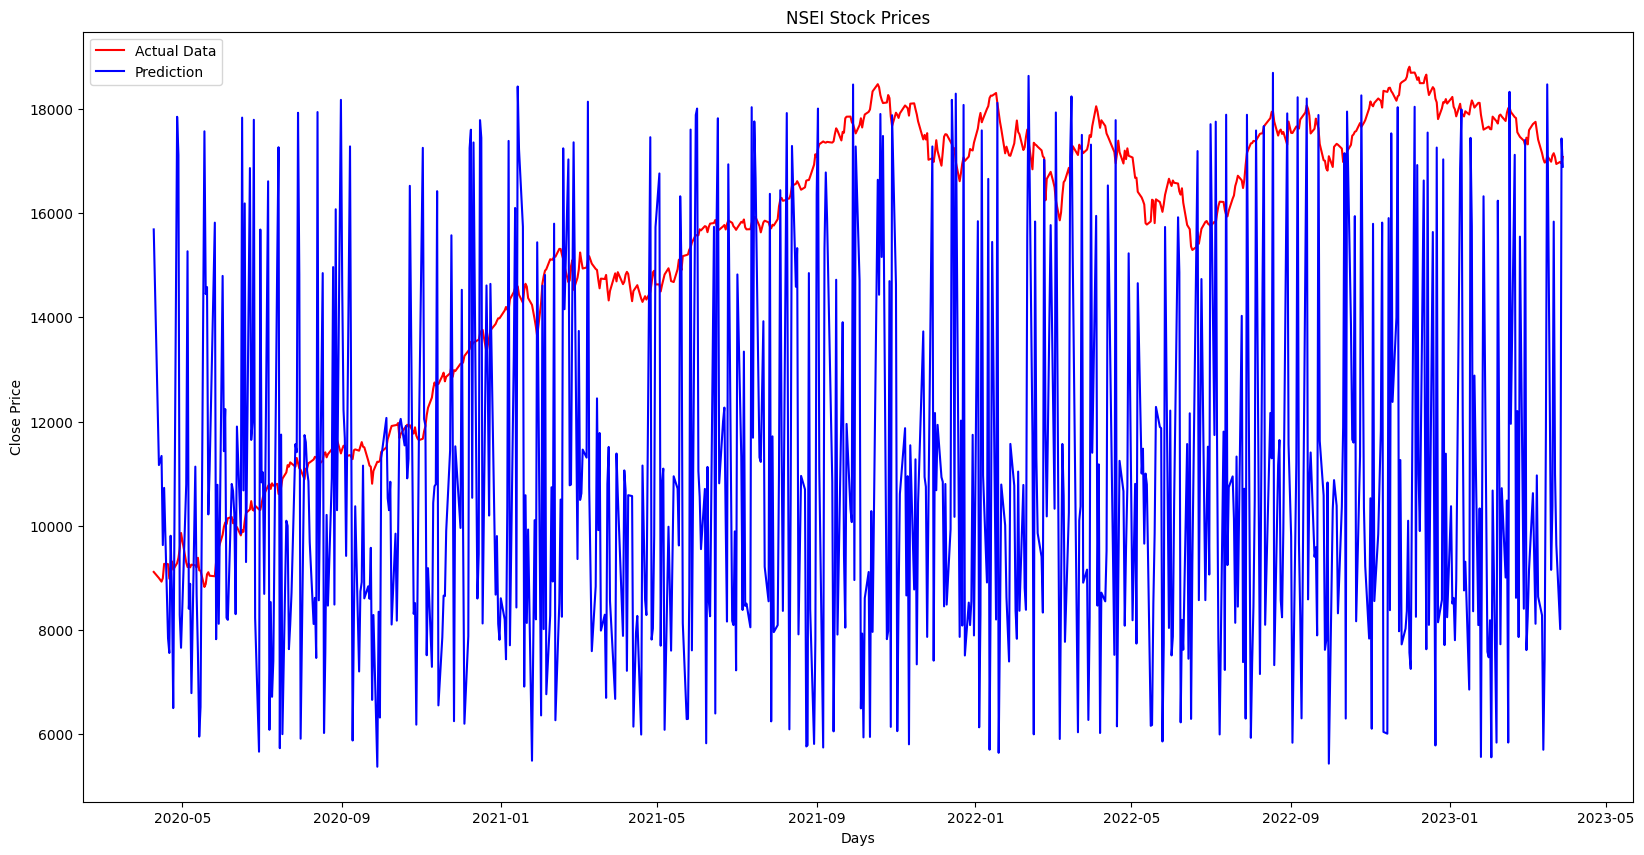

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred_lr, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Random Forest Regressor**

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor_rf = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#predict value against test
y_pred_rf = regressor_rf.predict(x_test)

In [ ]:
#evaluate model's performance on train data
predict_rf = regressor_rf.predict(x_train)
r2 = r2_score(y_train, predict_rf)
mse = mean_squared_error(y_train, predict_rf)
rmse = mean_squared_error(y_train, predict_rf, squared=False)
mae = mean_absolute_error(y_train, predict_rf)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999635537376743
Mean Squared Error: 489.46909923654454
Root Mean Squared Error: 22.123948545333054
Mean Absolute Error: 13.623005689745472


In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
mae = mean_absolute_error(y_test, y_pred_rf)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9997656209951735
Mean Squared Error: 2983.395720000081
Root Mean Squared Error: 54.62046978926564
Mean Absolute Error: 37.83589005564143


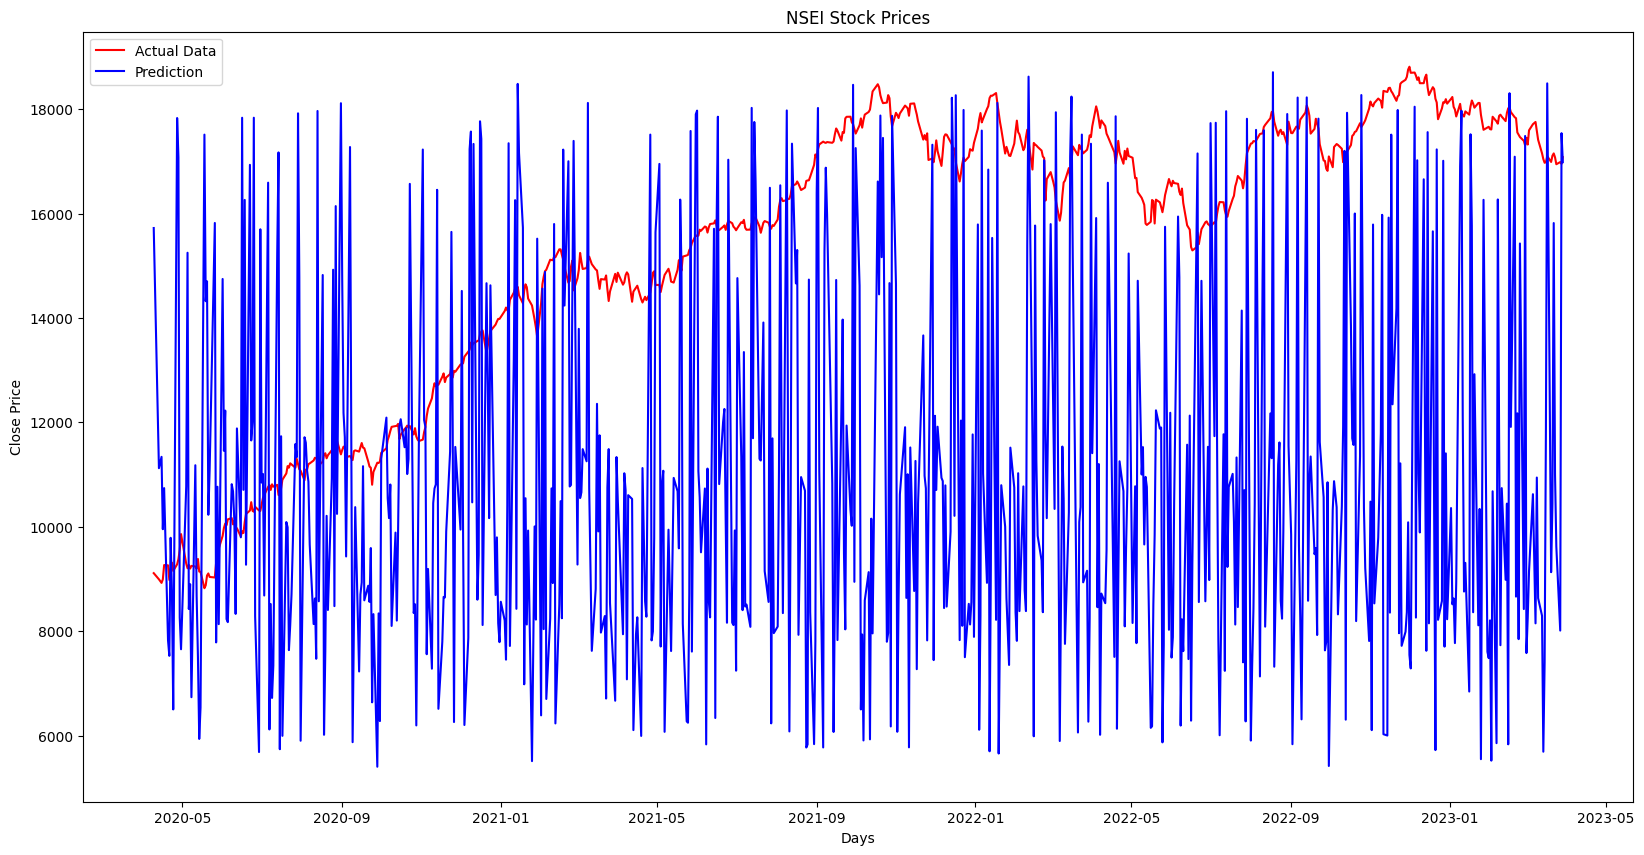

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred_rf, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Decision Tree Regressor**

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor_dt = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#predict value against test
y_pred_dt = regressor_dt.predict(x_test)

In [ ]:
#evaluate model's performance on train data
predict_dt = regressor_dt.predict(x_train)
r2 = r2_score(y_train, predict_dt)
mse = mean_squared_error(y_train, predict_dt)
rmse = mean_squared_error(y_train, predict_dt, squared=False)
mae = mean_absolute_error(y_train, predict_dt)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 1.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
mae = mean_absolute_error(y_test, y_pred_dt)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9996006357922641
Mean Squared Error: 5083.482067698628
Root Mean Squared Error: 71.29854183430842
Mean Absolute Error: 47.34865917139005


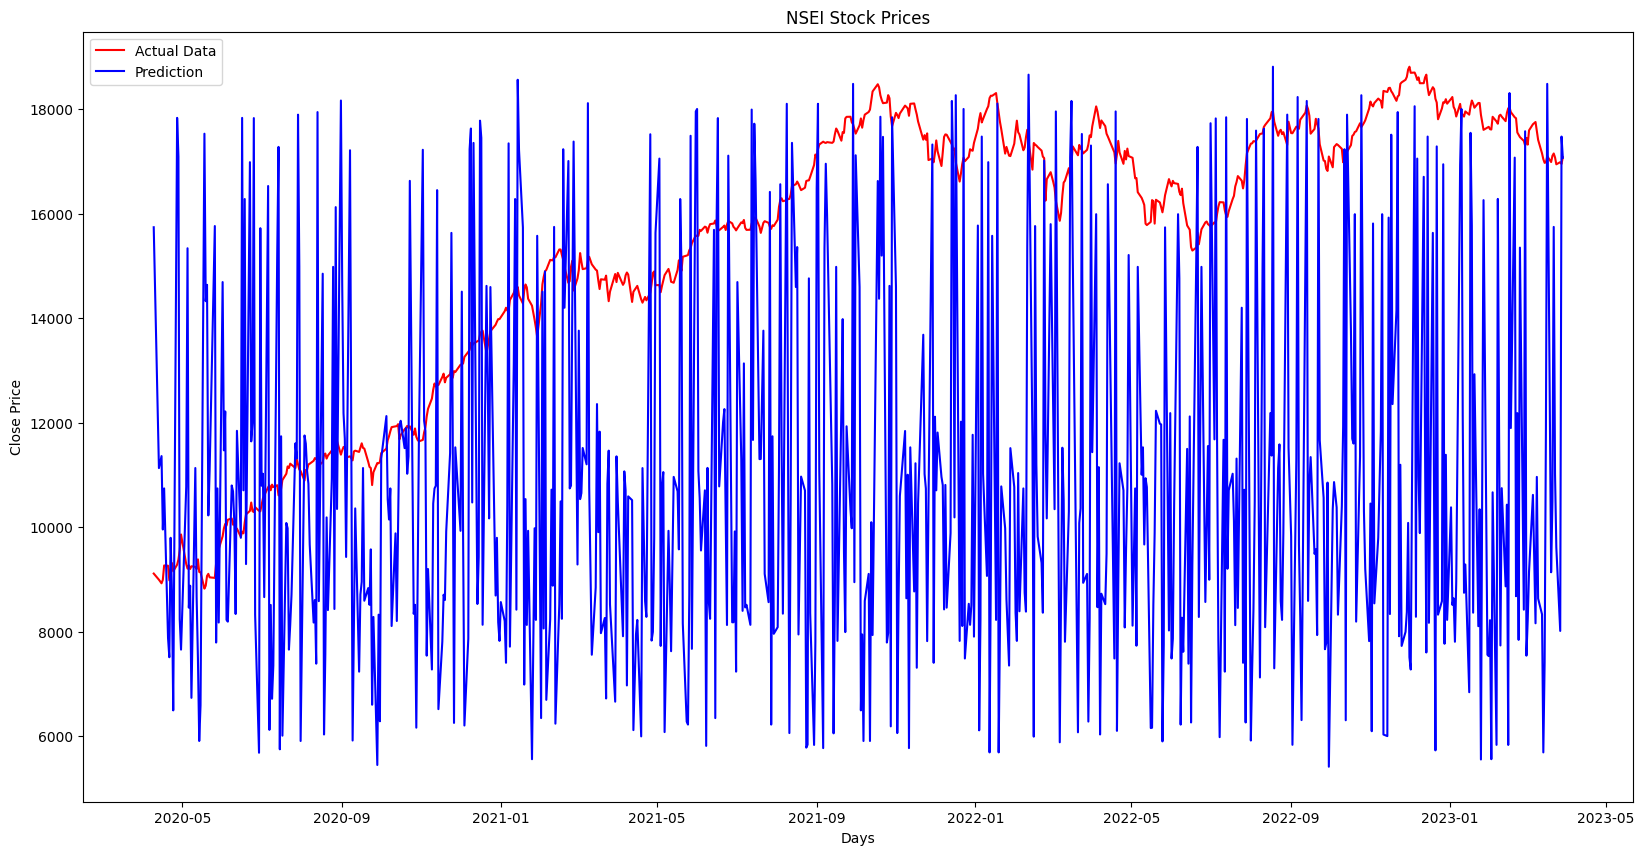

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred_dt, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

regressor_svr = SVR(kernel='rbf')

sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_sc = sc_x.fit_transform(x_train)
y_train_sc = sc_y.fit_transform(y_train)

# fit the regressor with X and Y data
regressor_svr.fit(x_train_sc, y_train_sc)

AttributeError: ignored

In [ ]:
#predict value against test
y_pred_svr = regressor_svr.predict(x_test)

In [ ]:
#evaluate model's performance on train data
predict_svr = regressor_dt.predict(x_train)
r2 = r2_score(y_train, predict_svr)
mse = mean_squared_error(y_train, predict_svr)
rmse = mean_squared_error(y_train, predict_svr, squared=False)
mae = mean_absolute_error(y_train, predict_svr)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 1.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
mae = mean_absolute_error(y_test, y_pred_svr)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.01319019249083453
Mean Squared Error: 12561040.432594173
Root Mean Squared Error: 3544.1558138143664
Mean Absolute Error: 2722.81925878812


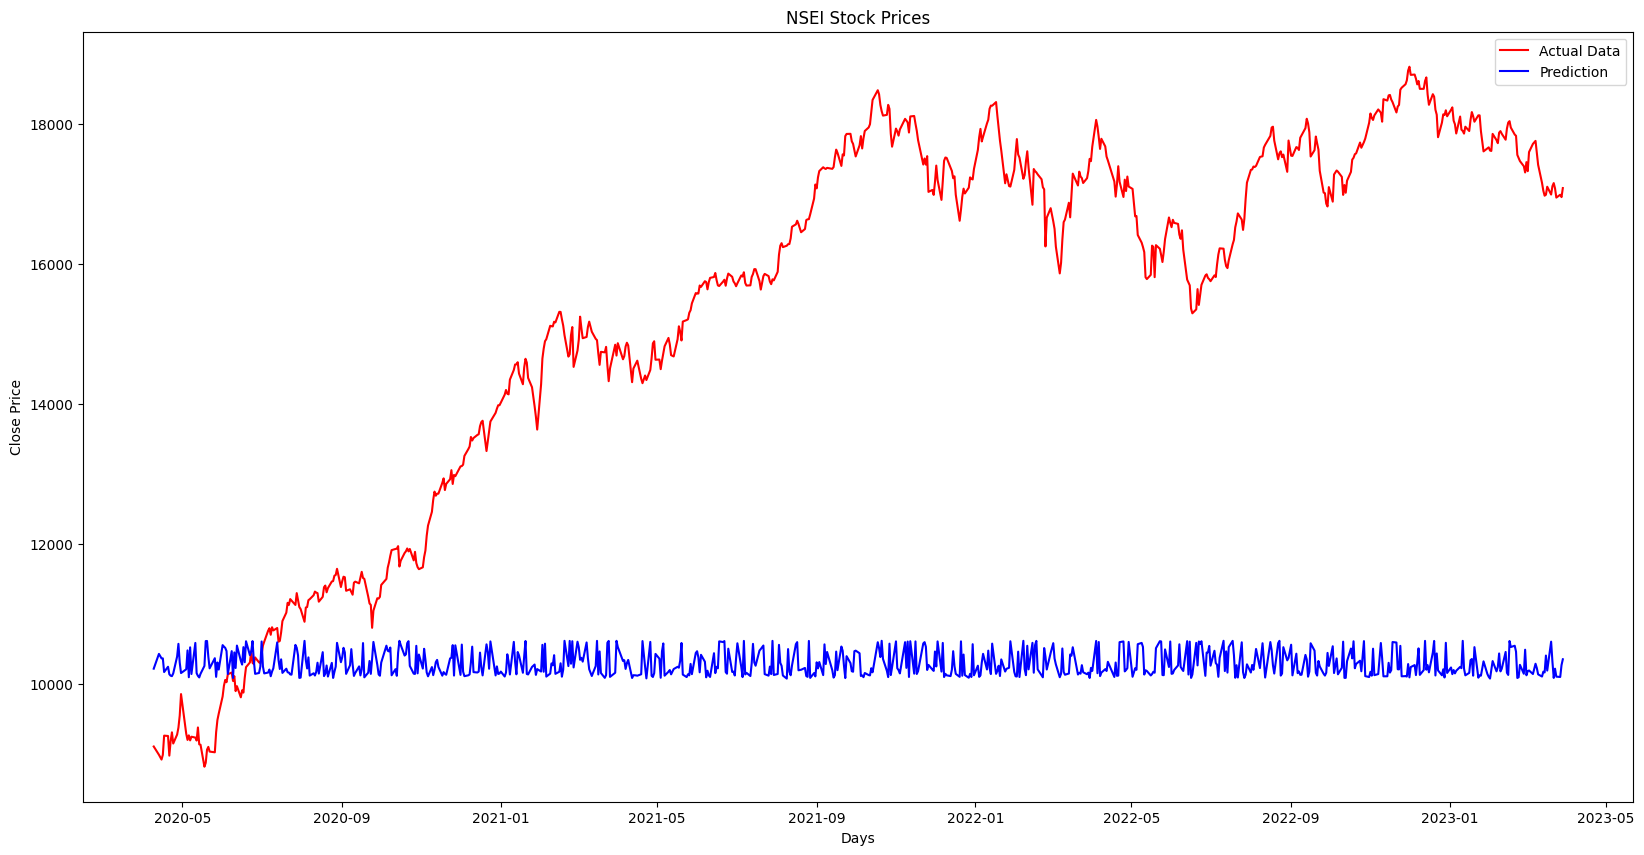

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred_svr, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()